In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from matplotlib import cm
from matplotlib import animation
import warnings
warnings.filterwarnings("ignore")
import wordcloud
from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [2]:
omni = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/Latest%20Dataset%20for%20Omicron%20variant%20of%20COVID-19/covid-cases-omicron.csv")
omni.head()

,Entity,Code,Day,Omicron_percentage
0,Angola,AGO,2021-09-20,0.0
1,Angola,AGO,2021-10-04,0.0
2,Argentina,ARG,2021-09-20,0.0
3,Argentina,ARG,2021-10-04,0.0
4,Argentina,ARG,2021-10-18,0.0


In [3]:
omni = omni.rename(columns={"Entity":"Country"})
omni

,Country,Code,Day,Omicron_percentage
0,Angola,AGO,2021-09-20,0.0
1,Angola,AGO,2021-10-04,0.0
2,Argentina,ARG,2021-09-20,0.0
3,Argentina,ARG,2021-10-04,0.0
4,Argentina,ARG,2021-10-18,0.0
...,...,...,...,...
547,Vietnam,VNM,2021-11-15,0.0
548,Vietnam,VNM,2021-11-29,0.0
549,Vietnam,VNM,2021-12-13,0.0
550,Vietnam,VNM,2021-12-27,2.0


In [4]:
omni.isnull().sum()

Country               0
Code                  0
Day                   0
Omicron_percentage    0
dtype: int64

In [5]:
omni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             552 non-null    object 
 1   Code                552 non-null    object 
 2   Day                 552 non-null    object 
 3   Omicron_percentage  552 non-null    float64
dtypes: float64(1), object(3)
memory usage: 17.4+ KB


In [6]:
omni.describe(percentiles=[.05,.1,.25,.5,.75,.9,.95])

,Omicron_percentage
count,552.000000
mean,5.925054
std,17.723560
min,0.000000
5%,0.000000
10%,0.000000
25%,0.000000
50%,0.000000
75%,0.152500
90%,17.583000


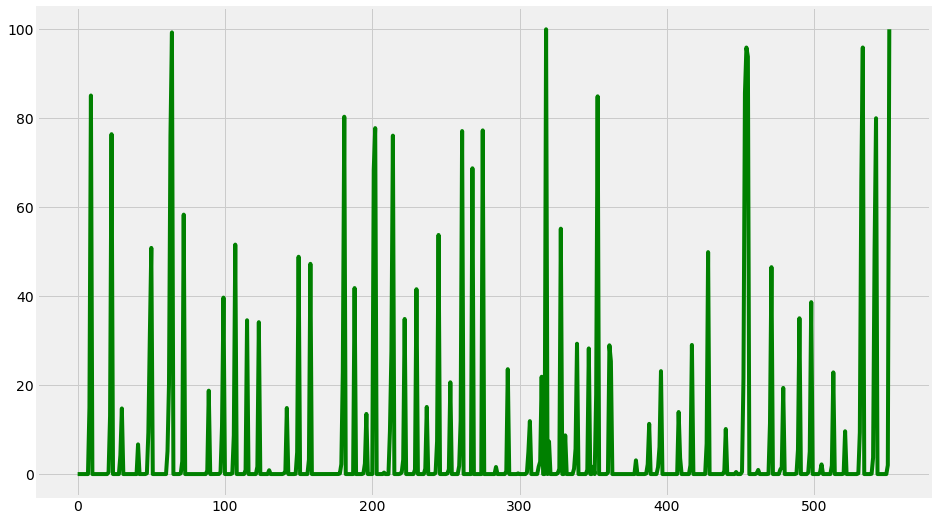

In [7]:
plt.figure(figsize=(16,9))
plt.style.use("fivethirtyeight")
plt.plot(omni['Omicron_percentage'],color="green")

In [8]:
omni.Day = pd.to_datetime(omni.Day)
omni.Month = pd.DatetimeIndex(omni.Day).month
omni.Year = pd.DatetimeIndex(omni.Day).year
omni

,Country,Code,Day,Omicron_percentage
0,Angola,AGO,2021-09-20,0.0
1,Angola,AGO,2021-10-04,0.0
2,Argentina,ARG,2021-09-20,0.0
3,Argentina,ARG,2021-10-04,0.0
4,Argentina,ARG,2021-10-18,0.0
...,...,...,...,...
547,Vietnam,VNM,2021-11-15,0.0
548,Vietnam,VNM,2021-11-29,0.0
549,Vietnam,VNM,2021-12-13,0.0
550,Vietnam,VNM,2021-12-27,2.0


In [9]:
omni.Month

Int64Index([ 9, 10,  9, 10, 10, 11, 11, 11, 12, 12,
            ...
             1,  9, 10, 10, 11, 11, 11, 12, 12, 12],
           dtype='int64', name='Day', length=552)

In [10]:
omni.columns

Index(['Country', 'Code', 'Day', 'Omicron_percentage'], dtype='object')

In [11]:
omni.loc[omni.Day=="2021-09-20"]

,Country,Code,Day,Omicron_percentage
0,Angola,AGO,2021-09-20,0.0
2,Argentina,ARG,2021-09-20,0.0
10,Aruba,ABW,2021-09-20,0.0
16,Australia,AUS,2021-09-20,0.0
24,Austria,AUT,2021-09-20,0.0
...,...,...,...,...
514,Turkey,TUR,2021-09-20,0.0
522,Ukraine,UKR,2021-09-20,0.0
525,United Kingdom,GBR,2021-09-20,0.0
534,United States,USA,2021-09-20,0.0


In [12]:
first_day = omni.loc[omni.Day=="2021-09-20"]
pd.set_option('display.max_rows', None)
first_day

,Country,Code,Day,Omicron_percentage
0,Angola,AGO,2021-09-20,0.0
2,Argentina,ARG,2021-09-20,0.0
10,Aruba,ABW,2021-09-20,0.0
16,Australia,AUS,2021-09-20,0.0
24,Austria,AUT,2021-09-20,0.0
35,Bangladesh,BGD,2021-09-20,0.0
42,Belgium,BEL,2021-09-20,0.0
57,Botswana,BWA,2021-09-20,0.0
65,Brazil,BRA,2021-09-20,0.0
76,Bulgaria,BGR,2021-09-20,0.0


In [13]:
omni.groupby("Day")["Omicron_percentage"].sum().nlargest(10)

Day
2021-12-27    1888.09
2021-12-13     781.14
2022-01-05     318.39
2021-11-29     244.36
2021-11-15      36.50
2021-10-18       1.67
2021-11-01       0.48
2021-09-20       0.00
2021-10-04       0.00
Name: Omicron_percentage, dtype: float64

In [14]:
omni.loc[omni.Omicron_percentage > 0]

,Country,Code,Day,Omicron_percentage
8,Argentina,ARG,2021-12-13,14.94
9,Argentina,ARG,2021-12-27,85.11
21,Australia,AUS,2021-11-29,0.40
22,Australia,AUS,2021-12-13,13.07
23,Australia,AUS,2021-12-27,76.42
29,Austria,AUT,2021-11-29,4.24
30,Austria,AUT,2021-12-13,14.75
41,Bangladesh,BGD,2021-12-13,6.67
47,Belgium,BEL,2021-11-29,0.16
48,Belgium,BEL,2021-12-13,9.39


In [15]:
f_case = omni.loc[omni.Omicron_percentage > 0].sort_values("Day", ascending=True)
f_case

,Country,Code,Day,Omicron_percentage
350,Nigeria,NGA,2021-10-18,1.67
451,South Africa,ZAF,2021-11-01,0.48
212,Hong Kong,HKG,2021-11-15,9.68
177,France,FRA,2021-11-15,0.01
219,India,IND,2021-11-15,0.07
452,South Africa,ZAF,2021-11-15,21.55
96,Canada,CAN,2021-11-15,0.02
61,Botswana,BWA,2021-11-15,5.17
148,Denmark,DNK,2021-11-29,0.04
105,Chile,CHL,2021-11-29,0.17


Text(0.5, 1.0, 'Which Country in the first days had high cases?')

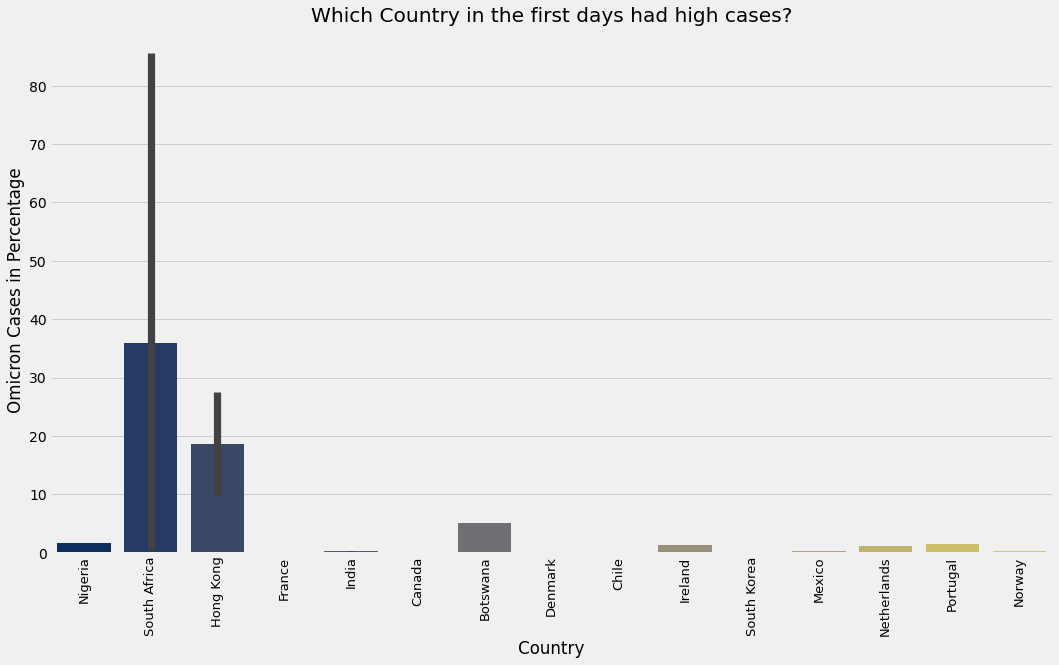

In [16]:
plt.style.use("fivethirtyeight")
_,ax=plt.subplots(figsize=(16,9))
sns.barplot(x="Country", y="Omicron_percentage", data=f_case.head(20), palette="cividis")
plt.tick_params(axis="x", which="major", labelsize=13, rotation=90)
plt.ylabel("Omicron Cases in Percentage")
plt.xlabel("Country")
plt.title("Which Country in the first days had high cases?")

In [17]:
case22 = omni.loc[omni.Omicron_percentage > 0].sort_values("Day", ascending=False)
case22

,Country,Code,Day,Omicron_percentage
181,France,FRA,2022-01-05,80.34
542,United States,USA,2022-01-05,80.00
388,Poland,POL,2022-01-05,11.29
533,United Kingdom,GBR,2022-01-05,95.91
50,Belgium,BEL,2022-01-05,50.85
188,Georgia,GEO,2021-12-27,41.82
387,Poland,POL,2021-12-27,2.21
396,Portugal,PRT,2021-12-27,23.14
196,Germany,DEU,2021-12-27,13.52
409,Romania,ROU,2021-12-27,3.61


Text(0.5, 1.0, 'Which Country has high cases in 2022?')

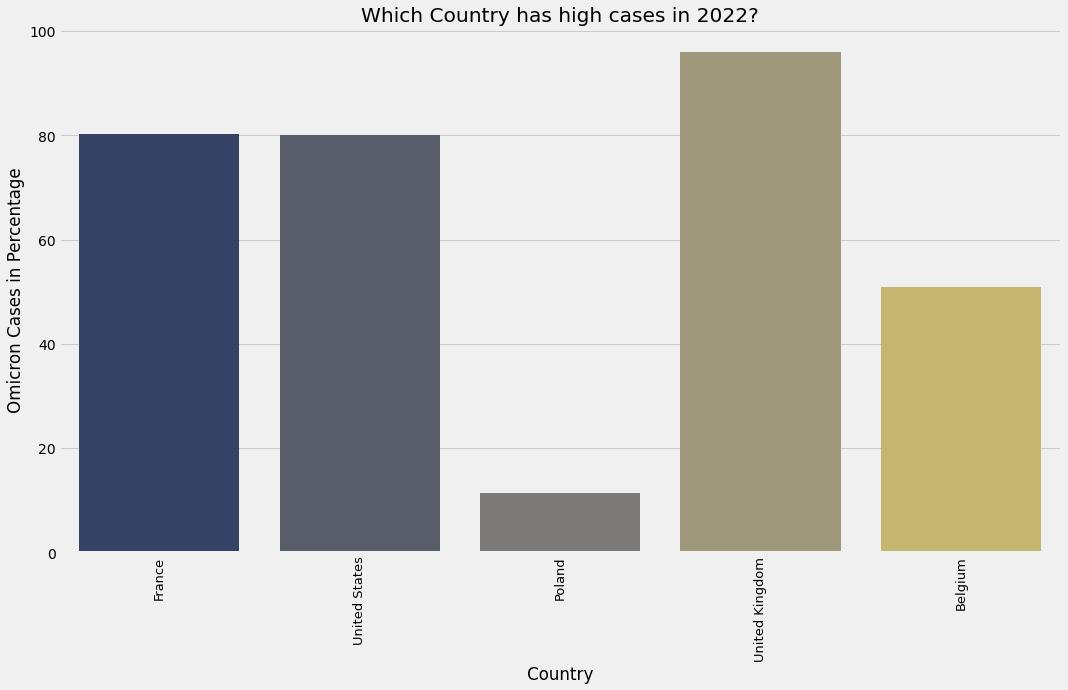

In [18]:
_,ax=plt.subplots(figsize=(16,9))
sns.barplot(x="Country", y="Omicron_percentage", data=case22.head(5), palette="cividis")
plt.tick_params(axis="x", which="major", labelsize=13, rotation=90)
plt.ylabel("Omicron Cases in Percentage")
plt.xlabel("Country")
plt.title("Which Country has high cases in 2022?")

In [19]:
omni[["Country","Omicron_percentage"]].groupby(["Country"], as_index=False).mean()

,Country,Omicron_percentage
0,Angola,0.000000
1,Argentina,12.506250
2,Aruba,0.000000
3,Australia,11.236250
4,Austria,2.712857
5,Bahrain,0.000000
6,Bangladesh,0.952857
7,Belgium,10.164444
8,Bosnia and Herzegovina,0.000000
9,Botswana,25.091250


<AxesSubplot:xlabel='Country'>

<Figure size 1152x648 with 0 Axes>

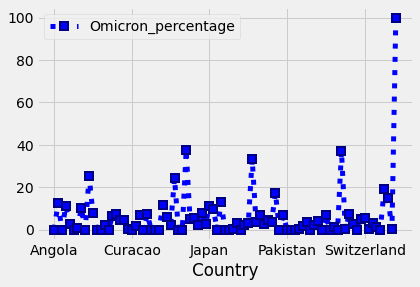

In [20]:
plt.figure(figsize=(16,9))
omni[["Country","Omicron_percentage"]].groupby(["Country"]).mean().plot(marker="s", c="b", lw=5,ls=":", mec="navy", ms=8, mew=2)

In [21]:
omni.groupby('Code')['Omicron_percentage'].sum().nlargest(10)

Code
ZAF    297.43
BWA    200.73
GBR    171.03
GHA    146.20
USA    133.87
HKG    113.27
FRA    105.61
NGA    104.46
ARG    100.05
MLT    100.00
Name: Omicron_percentage, dtype: float64

Text(0.5, 1.0, 'Omicron Percentage')

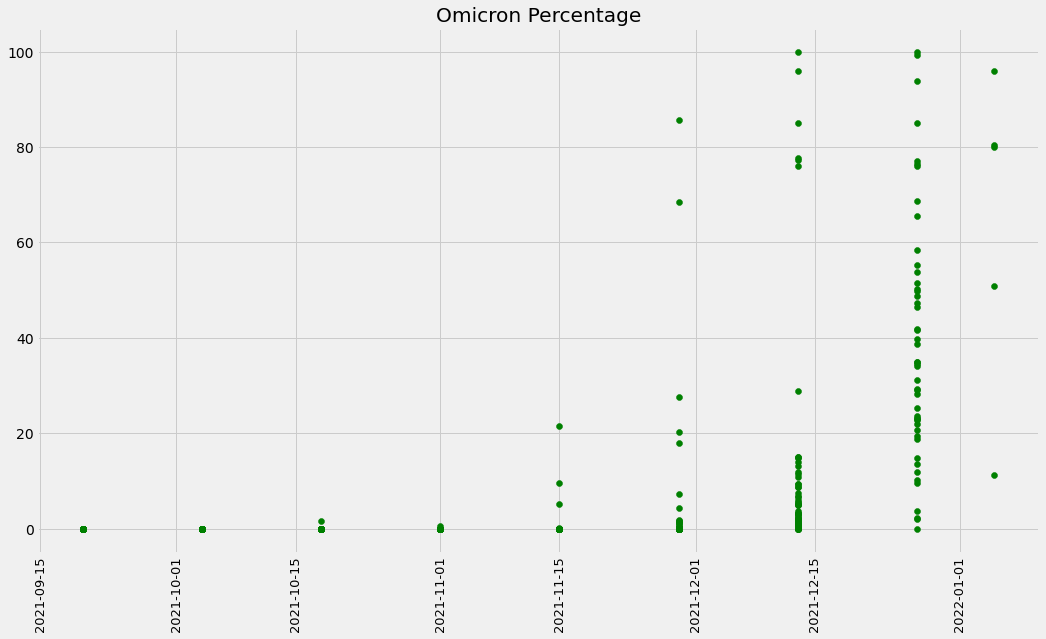

In [22]:
plt.figure(figsize=(16,9))
plt.style.use("fivethirtyeight")
plt.scatter(omni['Day'],omni['Omicron_percentage'],color="green")
plt.tick_params(axis="x", which="major", labelsize=13, rotation=90)
plt.title("Omicron Percentage")